# Assignment 4 : Simple Linear Regression - Salary Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df= pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
df.shape

(30, 2)

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

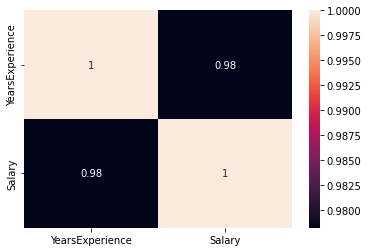

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Data Visualization

Text(0.5, 1.0, 'Square Root Transformed Data')

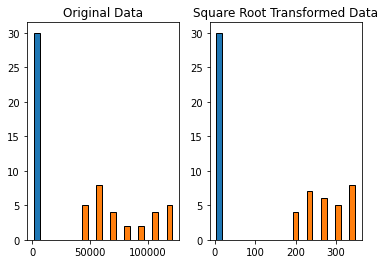

In [10]:
df_sqrt = np.sqrt(df)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_sqrt, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

Text(0.5, 1.0, 'Log-Transformed Data')

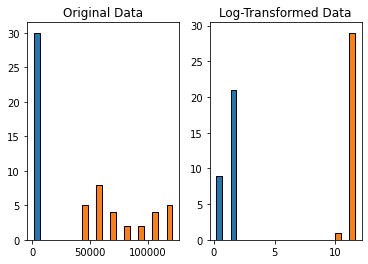

In [11]:
df_log = np.log(df)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'YearsExperience Q-Q plot')

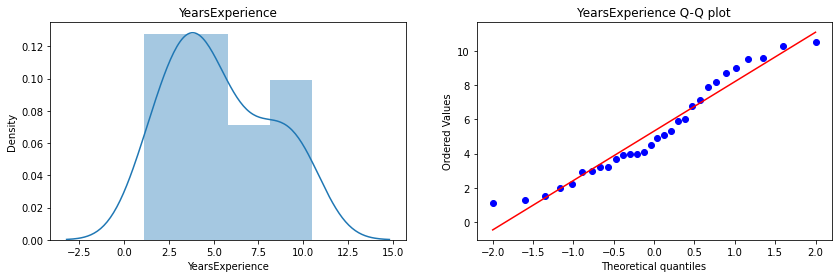

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['YearsExperience'])
plt.title('YearsExperience')

plt.subplot(122)
stats.probplot(df['YearsExperience'], dist = 'norm', plot=plt)
plt.title ('YearsExperience Q-Q plot')

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salary Q-Q plot')

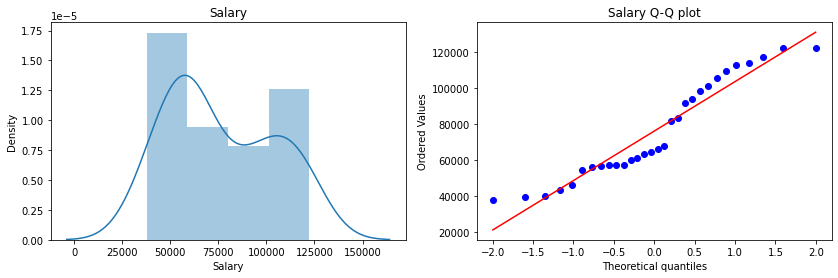

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Salary'])
plt.title('Salary')

plt.subplot(122)
stats.probplot(df['Salary'], dist = 'norm', plot=plt)
plt.title ('Salary Q-Q plot')

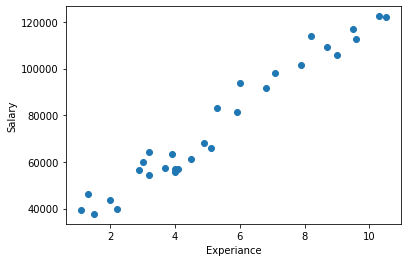

In [14]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("Experiance")
plt.ylabel("Salary")
plt.show()

# Model Fitting and Validation

In [15]:
x=df['YearsExperience']
y=df['Salary']

In [14]:
x=np.array(x)
y=np.array(y)

In [15]:
X = x.reshape(-1,1)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [18]:
model.coef_

array([9449.96232146])

In [19]:
model.intercept_

25792.20019866871

In [20]:
model.predict([[8]])

array([101391.89877031])

In [22]:
y_pred = model.predict(X)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
mean_squared_error(y,y_pred)

31270951.722280968

In [25]:
r2_score(y,y_pred)

0.9569566641435086

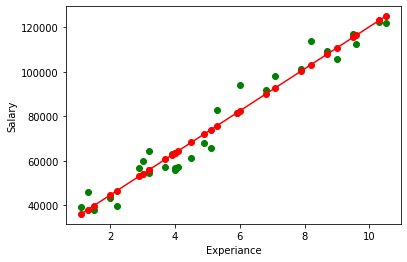

In [27]:
plt.scatter(x,y,color="green")
plt.scatter(x,y_pred,color="red")
plt.plot(x,y_pred,color="red")
plt.xlabel("Experiance")
plt.ylabel("Salary")
plt.show()